In [1]:
import sys

sys.path.append("../")
sys.path.append("../../")
sys.path.append("../../..")
sys.path.append("../../../../")
import torch
import pickle
import random
import pandas as pd
import numpy as np

#import main_regression as mr
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

cpu is available.


# 1. Basic Setting

In [2]:
num_epochs = 1 # 학습 epoch 횟수, int(default: 1000, 범위: 1 이상)
batch_size = 16  # batch 크기, int(default: 16, 범위: 1 이상, 컴퓨터 사양에 적합하게 설정)

# 2. Without Representation
## 2-1. Data preparation 

In [3]:
import setting

model_list = ["LSTM_rg","GRU_rg", "CNN_1D_rg","LSTM_FCNs_rg"] #FC_cf는 빼야함
model_name = model_list[0]
datafolderAddress = '../data/'
train_x, train_y,test_x, test_y = setting.getTrainDataFromFilesForRegression(datafolderAddress, model_name)

(95, 24, 144)
(95,)
(42, 24, 144)
(42,)
inputSize(train_x.shape[1]): 24
sequenceLenth (train_x.shape[2]): 144


## 2-2. parameter Preparation

In [4]:
# Option Setting
config = setting.modelTestconfig[model_name]
config['input_size'] = train_x.shape[1]
config['seq_len']  = train_x.shape[2] # seq_length
config['device']  = device

from KETIToolDL import modelInfo
trainDataPathList = ["CLUST", "Electronics","FileTest"]
MI = modelInfo.ModelFileManager()
modelFilePath = MI.getModelFilePath(trainDataPathList, model_name)

## 2-3 Training

In [6]:
from KETIToolDL.TrainTool.Regression.trainer import RegressionML as RML
rml = RML(model_name, config)
model = rml.getModel()
rml.processInputData(train_x, train_y, batch_size)
best_model = rml.trainModel(model, modelFilePath, num_epochs)

Start training model

Epoch 1/1
train Loss: 223.7675
val Loss: 190.3354

Training complete in 0m 1s
Best val MSE: 190.335383


## 2-4 Testing

In [8]:
from KETIToolDL.TrainTool.Regression.trainer import RegressionML as RML
rml = RML(model_name, config)
model = rml.getModel()

from KETIToolDL.PredictionTool.Regression.inference import RegressionModelTestInference as RTI
ri = RTI(test_x, test_y, batch_size, device)
pred, mse, mae = ri.get_result(model, modelFilePath)


Start testing data

** Performance of test dataset ==> MSE = 200.40213012695312, MAE = 13.732988357543945
** Dimension of result for test dataset = (42,)


<AxesSubplot:>

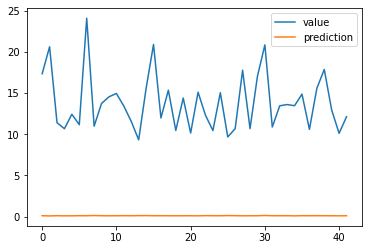

In [9]:
df_result = pd.DataFrame(data={"value": test_y, "prediction": pred})
df_result.plot()

## 2-5 Inference

In [11]:
#Only One Inference Input
infy = [[0]]
infx = [test_x[0]]

from KETIToolDL.TrainTool.Regression.trainer import RegressionML as RML
rml = RML(model_name, config)
model = rml.getModel()

from KETIToolDL.PredictionTool.Regression.inference import RegressionModelTestInference as RTI
ri = RTI(infx, infy, 1, device)
pred= ri.get_inferenceResult(model, modelFilePath)
print(pred)


Start testing data

[0.09284264]


--------------------------------------------------

# 3. With Representation
## 3-1. Data Preparation

In [14]:
model_list = ["FC_rg"] #FC_cf는 빼야함
model_name = model_list[0]
datafolderAddress = '../data/'
train_x, train_y,test_x, test_y = setting.getTrainDataFromFilesForRegression(datafolderAddress, model_name)

## 3-2. parameter Preparation

In [15]:
# Case 5. fully-connected layers (w/ data representation)
config = setting.modelTestconfig[model_name]
config['input_size'] = train_x.shape[1]
config['device'] =device

from KETIToolDL import modelInfo
MI = modelInfo.ModelFileManager()
modelFilePath = MI.getModelFilePath(trainDataPathList, model_name)

## 3-3. Training

In [17]:
from KETIToolDL.TrainTool.Regression.trainer import RegressionML as RML
rml = RML(model_name, config)
rml.processInputData(train_x, train_y, batch_size)
model = rml.getModel()
best_model = rml.trainModel(model, modelFilePath, num_epochs)

Start training model

Epoch 1/1
train Loss: 228.5731
val Loss: 196.6091

Training complete in 0m 0s
Best val MSE: 196.609131


## 3-4. Testing

In [18]:
from KETIToolDL.PredictionTool.Regression.inference import RegressionModelTestInference as RTI
ri = RTI(test_x, test_y, batch_size, device)
pred, mse, mae = ri.get_result(model, modelFilePath)


Start testing data

** Performance of test dataset ==> MSE = 206.72744750976562, MAE = 13.957622528076172
** Dimension of result for test dataset = (42,)


<AxesSubplot:>

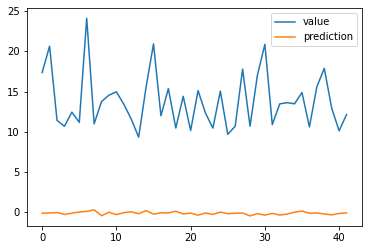

In [19]:
df_result = pd.DataFrame(data={"value": test_y, "prediction": pred})
df_result.plot()

## 3-5. Inference

In [21]:
#Only One Inference Input

infy = [0]
infx = test_x[:1]

from KETIToolDL.TrainTool.Regression.trainer import RegressionML as RML
rml = RML(model_name, config)
model = rml.getModel()


from KETIToolDL.PredictionTool.Regression.inference import RegressionModelTestInference as RTI
ri = RTI(infx, infy, 1, device)
pred= ri.get_inferenceResult(model, modelFilePath)


Start testing data

